In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open(r'spam.csv', 'r', encoding='utf-8', errors='replace') as file:
    # Use pandas to read the CSV from the opened file
    df = pd.read_csv(file)

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1.data cleaning
#2. eda-data analysis
#3.pre-processing
#4.model building
#5.evaluation
#6.improvement
#7.website
#8.deploy

##1.Data cleaning

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.duplicated().sum()

403

In [13]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

2.EDA

In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

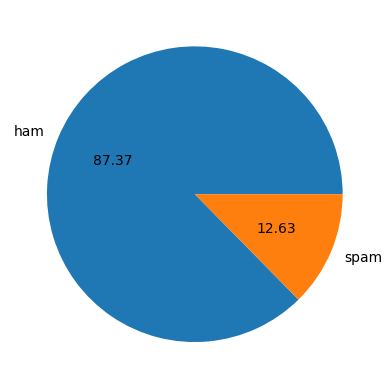

In [16]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")#formarkingvalues
plt.show()

In [17]:
pip install nltk

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Anshu
[nltk_data]     kanukula\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['num_char']=df['text'].apply(len)
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_char,num_sent,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [20]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456761,1.966531
std,58.174846,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
df[df.target==1][['num_char','num_words','num_sent']].describe()#spam msgs

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [22]:
df[df.target==0][['num_char','num_words','num_sent']].describe()#ham msgs

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123782,1.820195
std,56.356802,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_char', ylabel='Count'>

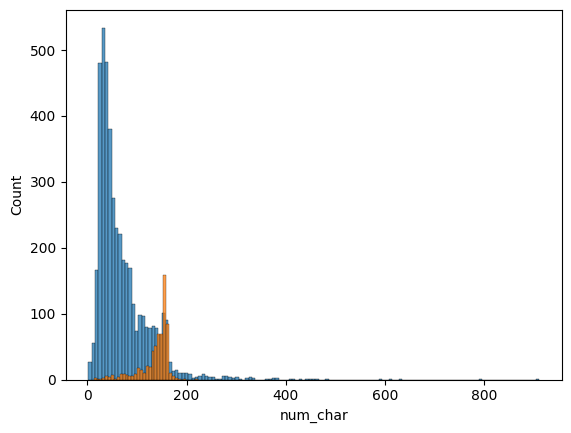

In [23]:
sns.histplot(df[df.target==0]['num_char'])
sns.histplot(df[df.target==1]['num_char'])


<Axes: xlabel='num_words', ylabel='Count'>

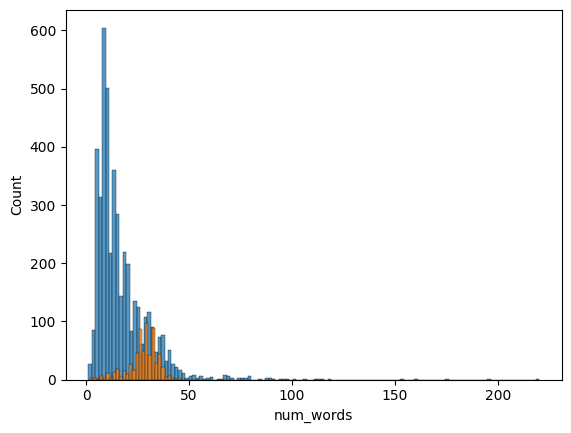

In [24]:
sns.histplot(df[df.target==0]['num_words'])
sns.histplot(df[df.target==1]['num_words'])

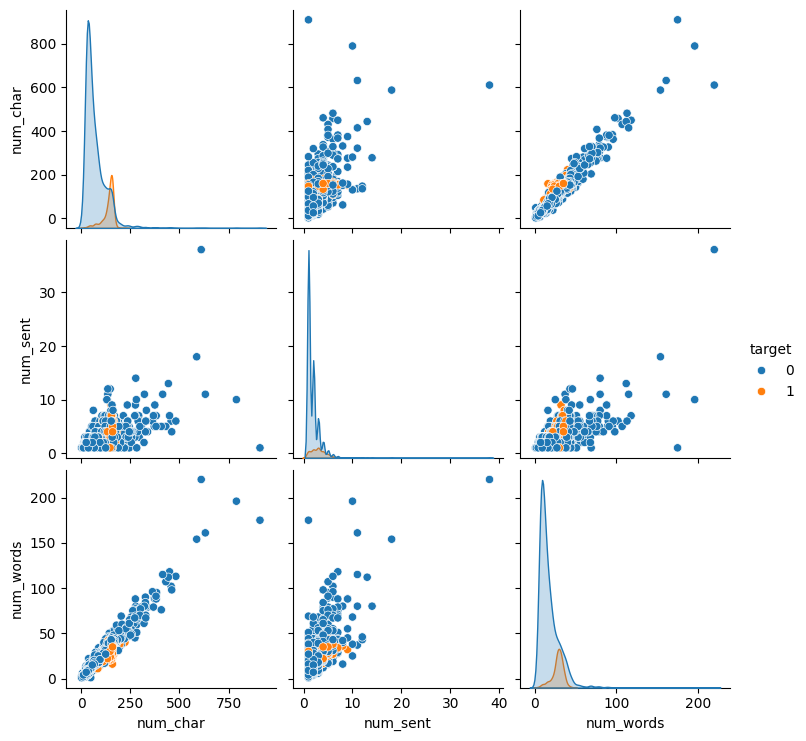

In [25]:
sns.pairplot(df,hue='target')#to check btw every coulumn

<Axes: >

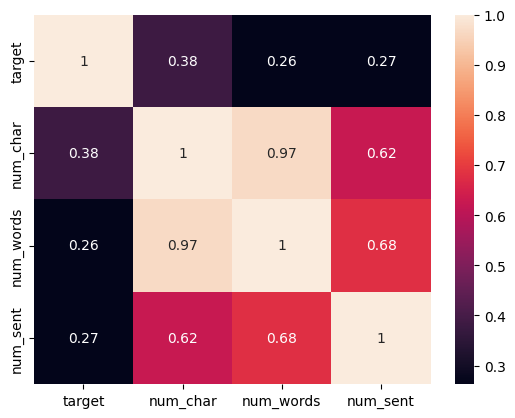

In [26]:
sns.heatmap(df[['target','num_char', 'num_words', 'num_sent']].corr(), annot=True)

3.data preprocessing:
        lower case,
        tokenization,
        removing special characters,
        removing stop words and puntuations,
        stemming,

In [27]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Anshu
[nltk_data]     kanukula\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('walking')

'walk'

In [29]:
import string


In [30]:
def transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [31]:
df['stemm']=df['text'].apply(transform)
df.head()

,target,text,num_char,num_sent,num_words,stemm
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


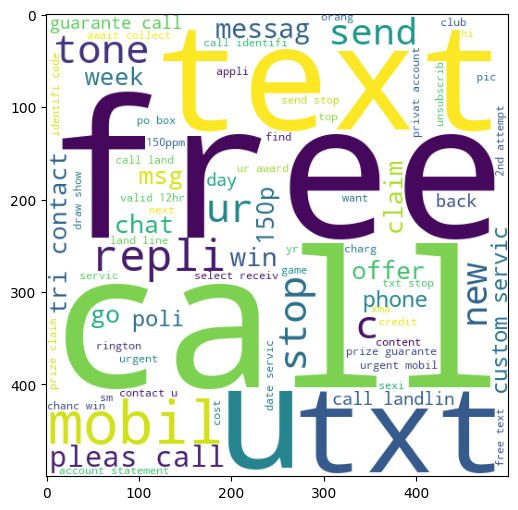

In [32]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['target']==1]['stemm'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

   target                                               text  num_char  \
0       0  Go until jurong point, crazy.. Available only ...       111   
1       0                      Ok lar... Joking wif u oni...        29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...       155   
3       0  U dun say so early hor... U c already then say...        49   
4       0  Nah I don't think he goes to usf, he lives aro...        61   

   num_sent  num_words                                              stemm  
0         2         24  go jurong point crazi avail bugi n great world...  
1         2          8                              ok lar joke wif u oni  
2         2         37  free entri 2 wkli comp win fa cup final tkt 21...  
3         1         13                u dun say earli hor u c alreadi say  
4         1         15               nah think goe usf live around though  


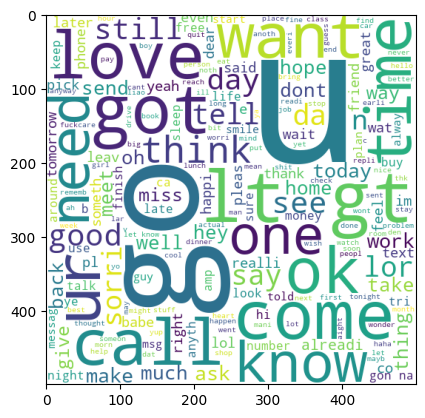

In [33]:
ham_wc=wc.generate(df[df['target']==0]['stemm'].str.cat(sep=" "))
print(df.head())
plt.imshow(ham_wc)

In [34]:
spam_corpus=[]
for msg in df[df['target']==1]['stemm'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9941

   target                                               text  num_char  \
0       0  Go until jurong point, crazy.. Available only ...       111   
1       0                      Ok lar... Joking wif u oni...        29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...       155   
3       0  U dun say so early hor... U c already then say...        49   
4       0  Nah I don't think he goes to usf, he lives aro...        61   

   num_sent  num_words                                              stemm  
0         2         24  go jurong point crazi avail bugi n great world...  
1         2          8                              ok lar joke wif u oni  
2         2         37  free entri 2 wkli comp win fa cup final tkt 21...  
3         1         13                u dun say earli hor u c alreadi say  
4         1         15               nah think goe usf live around though  


<Axes: xlabel='Word', ylabel='Count'>

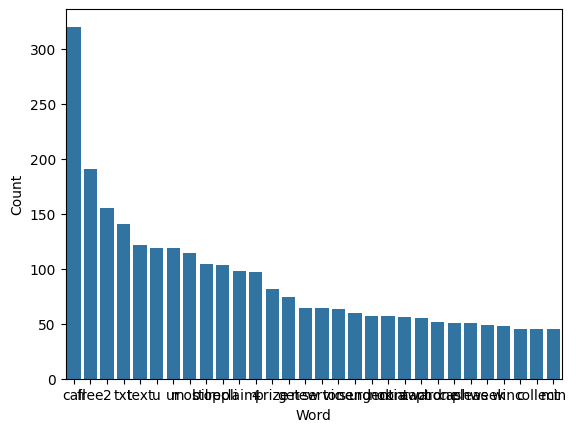

In [35]:
from collections import Counter
import pandas as pd
import seaborn as sns

# Assuming spam_corpus is a list of values you want to plot
spam_counter = Counter(spam_corpus)
most_common_30 = spam_counter.most_common(30)

# Create a DataFrame with columns 'Word' and 'Count'
data1 = pd.DataFrame(most_common_30, columns=['Word', 'Count'])
print(df.head())
# Now you can use Seaborn barplot
sns.barplot(x='Word', y='Count', data=data1)



35305


<Axes: xlabel='Word', ylabel='Count'>

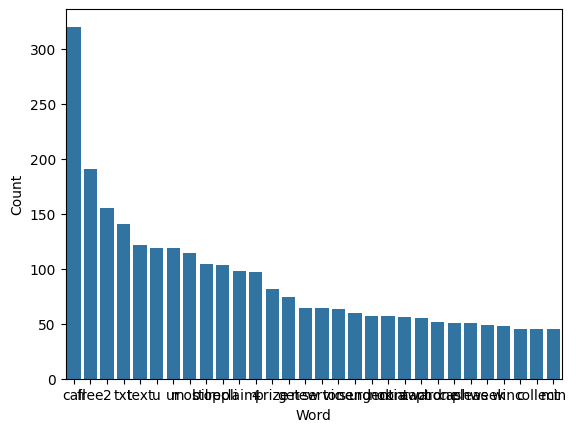

In [36]:
ham_corpus=[]
for msg in df[df['target']==0]['stemm'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
print(len(ham_corpus))
from collections import Counter
import pandas as pd
import seaborn as sns

# Assuming spam_corpus is a list of values you want to plot
ham_counter = Counter(ham_corpus)
most_common_30_ham = ham_counter.most_common(30)

# Create a DataFrame with columns 'Word' and 'Count'
data2 = pd.DataFrame(most_common_30, columns=['Word', 'Count'])

# Now you can use Seaborn barplot
sns.barplot(x='Word', y='Count', data=data2)

In [37]:
print(len(ham_corpus))

35305


model building

In [38]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(df.stemm).toarray()
x.shape

(5169, 6677)

In [39]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [42]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [43]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [44]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))


0.874274661508704
0.518348623853211
[[791 105]
 [ 25 113]]


In [65]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9593810444874274
1.0
[[896   0]
 [ 42  96]]


In [46]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.971953578336557
0.9823008849557522
[[894   2]
 [ 27 111]]


In [47]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [49]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [50]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbc,
    'xgb':xgb
    
}

In [51]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import accuracy_score, precision_score


In [52]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [53]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9908256880733946
For  AdaBoost
Accuracy -  0.9622823984526112
Precision -  0.9541284403669725
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8615384615384616
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.9313725490196079
For  xgb
Accuracy -  0.971953578336557
Precision -  0.957983193277311


In [54]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [55]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
3,DT,0.935203,0.838095
4,LR,0.951644,0.940000
5,RF,0.970019,0.990826
6,AdaBoost,0.962282,0.954128
7,BgC,0.957447,0.861538
8,ETC,0.976789,0.991379
9,GBDT,0.951644,0.931373


In [56]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.972921
1,KN,Accuracy,0.900387
2,NB,Accuracy,0.959381
3,DT,Accuracy,0.935203
4,LR,Accuracy,0.951644
5,RF,Accuracy,0.970019
6,AdaBoost,Accuracy,0.962282
7,BgC,Accuracy,0.957447
8,ETC,Accuracy,0.976789
9,GBDT,Accuracy,0.951644


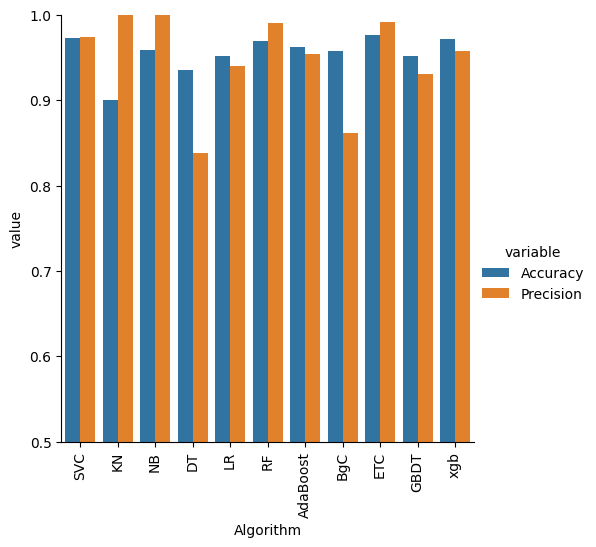

In [57]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [58]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [59]:
import streamlit

In [66]:
import pickle 

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))